## Change parameter bounds and guesses.  Fix a parameter value.
Fits binding of calcium onto EDTA. This will be a bad fit because we constrained the values to the wrong values.

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# AIC: 270.2406337771019
# AICc: 272.02786781965506
# BIC: 280.1855540099233
# F: 1327.1417522908107
# Rsq: 0.9908540574713021
# Rsq_adjusted: 0.990107449917939
# ln(L): -130.12031688855095
# num_obs: 54
# num_param: 4
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.19075e+04,1.97830e-01,float,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,2.20846e+00,2.79876e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,-1.25968e+04,1.07690e-02,float,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,1.69720e+07,1.36163e-04,float,1.00000e+03,1.00000e+00,1.00000e+12
local,fx_competent,ca-edta/tris-01.DH,1.00000e+00,0.00000e+00,fixed,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


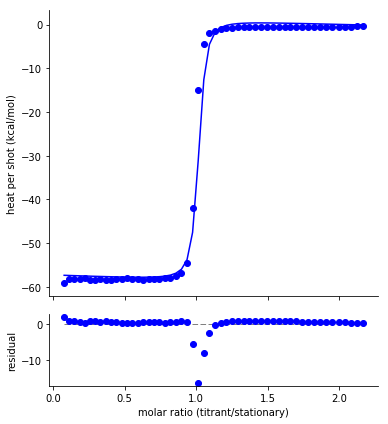

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Update bounds and guess for "K".  Then fix fx_competent.  
g.update_bounds("K",(1,1e12),a)
g.update_guess("K",1000,a)
g.update_fixed("fx_competent",1.0,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)